In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [4]:
df.shape

(211, 3)

In [5]:
df.ndim

2

In [6]:
df.tail()

,cgpa,iq,placement
206,6.15,140.5,0
207,4.00,87.2,0
208,4.00,130.8,0
209,5.87,126.8,0
210,5.62,76.3,0


In [8]:
df.describe()

,cgpa,iq,placement
count,211.000000,211.000000,211.000000
mean,6.233839,122.327014,0.507109
std,1.396877,33.751699,0.501138
min,3.300000,37.000000,0.000000
25%,5.200000,100.500000,0.000000
50%,6.110000,124.000000,1.000000
75%,7.100000,144.400000,1.000000
max,10.000000,233.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       211 non-null    float64
 1   iq         211 non-null    float64
 2   placement  211 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 5.1 KB


In [10]:
df.isna()

,cgpa,iq,placement
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
206,False,False,False
207,False,False,False
208,False,False,False
209,False,False,False


In [11]:
df.isna().sum()

cgpa         0
iq           0
placement    0
dtype: int64

In [14]:
!pip install --upgrade matplotlib
!pip install --upgrade seaborn

  Using cached matplotlib-3.10.8-cp313-cp313-win_amd64.whl.metadata (52 kB)
Using cached matplotlib-3.10.8-cp313-cp313-win_amd64.whl (8.1 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Uday\\anaconda3\\Lib\\site-packages\\matplotlib\\_c_internal_utils.cp313-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='cgpa', ylabel='iq'>

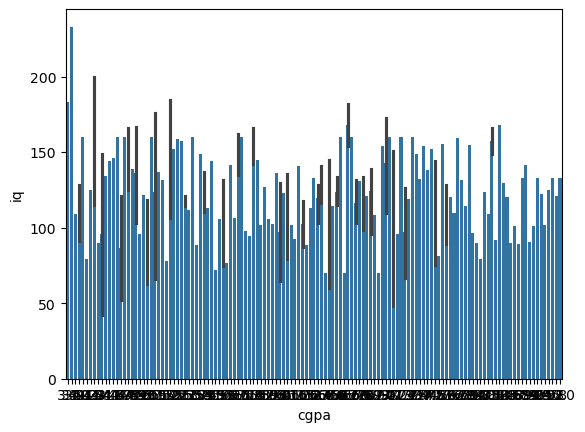

In [14]:
plt.figsize=(20,20)
sns.barplot(x='cgpa',y='iq',data=df)

<Axes: xlabel='placement', ylabel='count'>

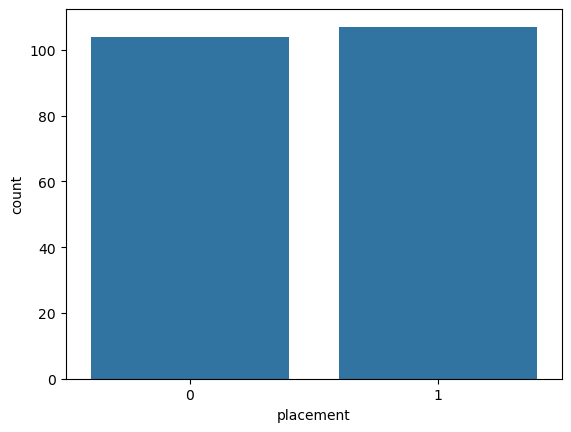

In [15]:
sns.countplot(x='placement',data=df)

In [16]:
 placed = df[df['placement']==1]

In [17]:
placed

,cgpa,iq,placement
0,6.80,123.0,1
3,7.40,132.0,1
5,7.10,48.0,1
10,6.00,45.0,1
11,6.90,138.0,1
...,...,...,...
156,6.48,70.0,1
157,6.76,130.6,1
158,8.40,129.4,1
159,7.62,120.4,1


<Axes: xlabel='placement', ylabel='iq'>

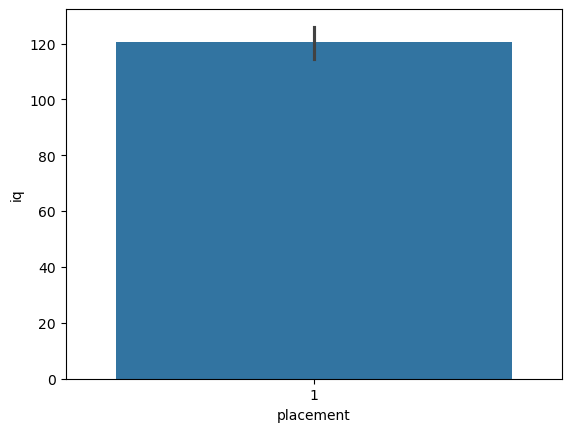

In [18]:
sns.barplot(x='placement',y='iq',data=placed)

<Axes: xlabel='placement', ylabel='iq'>

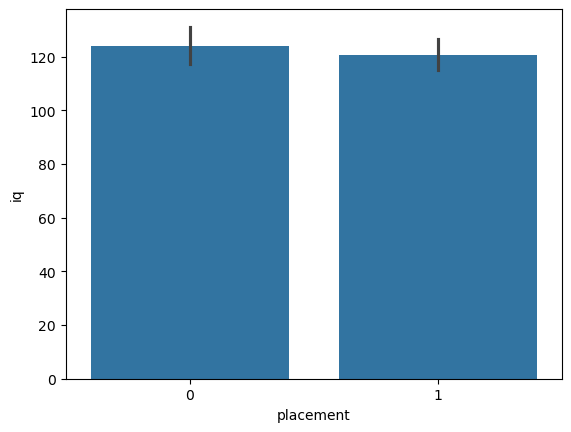

In [19]:
sns.barplot(x='placement',y='iq',data=df)

In [20]:
place=df['placement'].value_counts()


In [21]:
place

placement
1    107
0    104
Name: count, dtype: int64

In [22]:
not_placed = df[df['placement']==0]

In [23]:
not_placed

,cgpa,iq,placement
1,5.90,106.0,0
2,5.30,121.0,0
4,5.80,142.0,0
6,5.70,143.0,0
7,5.00,63.0,0
...,...,...,...
206,6.15,140.5,0
207,4.00,87.2,0
208,4.00,130.8,0
209,5.87,126.8,0


In [24]:
(not_placed['placement']==0).value_counts()

placement
True    104
Name: count, dtype: int64

In [25]:
input = df[['cgpa','iq']]

In [26]:
input

,cgpa,iq
0,6.80,123.0
1,5.90,106.0
2,5.30,121.0
3,7.40,132.0
4,5.80,142.0
...,...,...
206,6.15,140.5
207,4.00,87.2
208,4.00,130.8
209,5.87,126.8


In [27]:
output = df.iloc[:,-1]
output.shape

(211,)

In [28]:
output

0      1
1      0
2      0
3      1
4      0
      ..
206    0
207    0
208    0
209    0
210    0
Name: placement, Length: 211, dtype: int64

<Axes: xlabel='cgpa', ylabel='iq'>

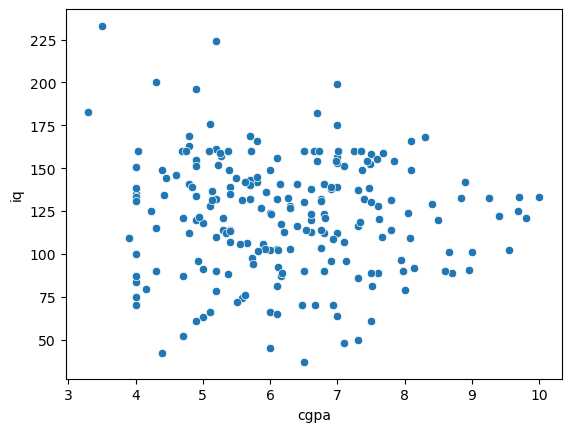

In [29]:
sns.scatterplot(x='cgpa',y='iq',data=df)

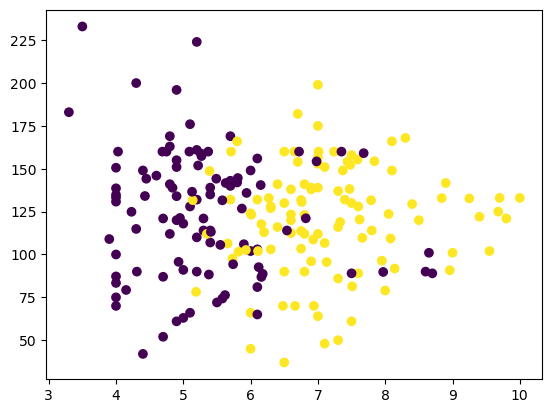

In [30]:
plt.scatter(x=df['cgpa'],y=df['iq'],c=df['placement'])

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test = train_test_split(input,output,test_size=0.1)

In [33]:
x_train

,cgpa,iq
86,5.10,128.0
96,4.40,42.0
47,5.20,161.0
39,4.60,146.0
157,6.76,130.6
...,...,...
60,6.90,139.0
208,4.00,130.8
149,5.82,101.6
73,4.90,61.0


In [34]:
x_test

,cgpa,iq
151,8.05,123.6
23,4.70,87.0
135,6.66,70.0
171,4.00,83.4
48,6.60,138.0
121,6.75,103.4
187,4.23,124.9
5,7.10,48.0
119,6.75,131.8
92,5.20,110.0


In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()


In [37]:
x_train = scaler.fit_transform(x_train)

In [38]:
x_test = scaler.fit_transform(x_test)

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
clf = LogisticRegression()
y_train.shape

(189,)

In [41]:
clf.fit(x_train,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [42]:
y_pred = clf.predict(x_test)

In [43]:
y_test

151    1
23     0
135    1
171    0
48     1
121    1
187    0
5      1
119    1
92     0
76     0
115    1
49     0
9      0
65     1
54     1
17     0
20     1
147    1
210    0
42     1
52     1
Name: placement, dtype: int64

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy_score(y_test,y_pred)

1.0

In [46]:
!pip install mlxtend

  Using cached matplotlib-3.10.8-cp313-cp313-win_amd64.whl.metadata (52 kB)
Using cached matplotlib-3.10.8-cp313-cp313-win_amd64.whl (8.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.5
    Uninstalling matplotlib-3.10.5:


ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\users\\uday\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
Consider using the `--user` option or check the permissions.



In [47]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

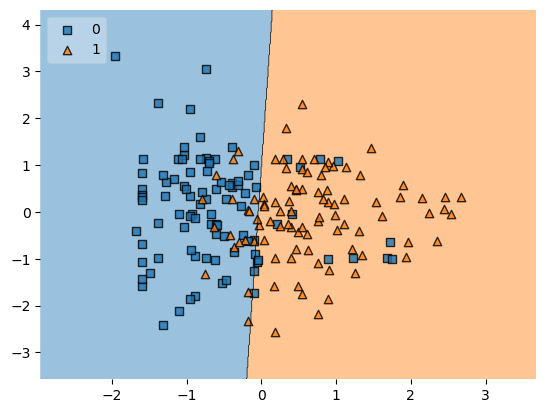

In [48]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [49]:
import pickle

In [50]:

pickle.dump(clf,open('model.pkl','wb'))
